In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import numpy as np

# Load train and test datasets using Pandas
train_data = pd.read_csv('/content/drive/MyDrive/Practice/CIFR(Ass2&3)/train_data.csv').values
test_data = pd.read_csv('/content/drive/MyDrive/Practice/CIFR(Ass2&3)/test_data.csv').values

# Assuming your data is organized with the first column as the label and the rest as image pixels
# Extract features (images) and labels
x_train = train_data[:, :3072]  # Exclude the first column which contains labels
y_train = train_data[:, 3072]  # First column contains labels

x_test = test_data[:, :3072]  # Exclude the first column which contains labels
y_test = test_data[:, 3072]  # First column contains labels

# Reshape the train and test data to represent images
image_width = 32
image_height = 32
num_channels = 3  # Assuming grayscale images

x_train = x_train.reshape(x_train.shape[0], image_width, image_height, num_channels)
x_test = x_test.reshape(x_test.shape[0], image_width, image_height, num_channels)


In [3]:
print('Shape of train : ' , x_train.shape)
print('Shape of test : ' , x_test.shape)

Shape of train :  (50000, 32, 32, 3)
Shape of test :  (10000, 32, 32, 3)


In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation = "softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6300)              0         
                                                                 
 dense (Dense)               (None, 200)               1260200   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                        

In [7]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(x_train,y_train,batch_size = 256,epochs = 50)

Epoch 1/50
196/196 [==============================] - 40s 198ms/step - loss: 1.7748 - accuracy: 0.3728
Epoch 2/50
196/196 [==============================] - 41s 210ms/step - loss: 1.4241 - accuracy: 0.5004
Epoch 3/50
196/196 [==============================] - 41s 209ms/step - loss: 1.2379 - accuracy: 0.5696
Epoch 4/50
196/196 [==============================] - 41s 211ms/step - loss: 1.1326 - accuracy: 0.6066
Epoch 5/50
196/196 [==============================] - 44s 223ms/step - loss: 1.0421 - accuracy: 0.6395
Epoch 6/50
196/196 [==============================] - 45s 227ms/step - loss: 0.9582 - accuracy: 0.6699
Epoch 7/50
196/196 [==============================] - 41s 208ms/step - loss: 0.8978 - accuracy: 0.6903
Epoch 8/50
196/196 [==============================] - 43s 217ms/step - loss: 0.8440 - accuracy: 0.7099
Epoch 9/50
196/196 [==============================] - 43s 217ms/step - loss: 0.7882 - accuracy: 0.7284
Epoch 10/50
196/196 [==============================] - 41s 210ms/step - l

In [8]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print('loss-%.3f' %test_loss)
print('Accuracy-%.3f' %test_acc)

313/313 [==============================] - 5s 12ms/step - loss: 1.6519 - accuracy: 0.6429
loss-1.652
Accuracy-0.643


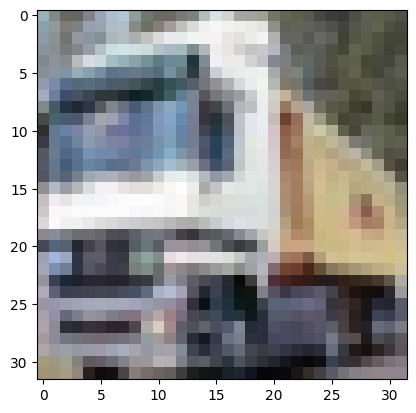

In [20]:
image = x_train[1]
plt.imshow(np.squeeze(image))
plt.show()

In [21]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model = model.predict([image])
print("Predicted Class : {}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 25ms/step
Predicted Class : 9


In [17]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


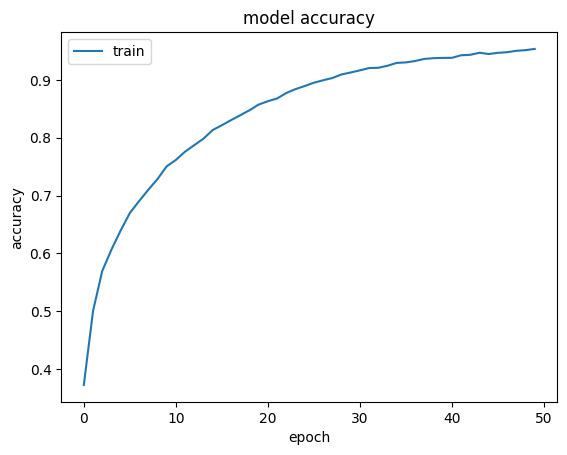

In [18]:
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

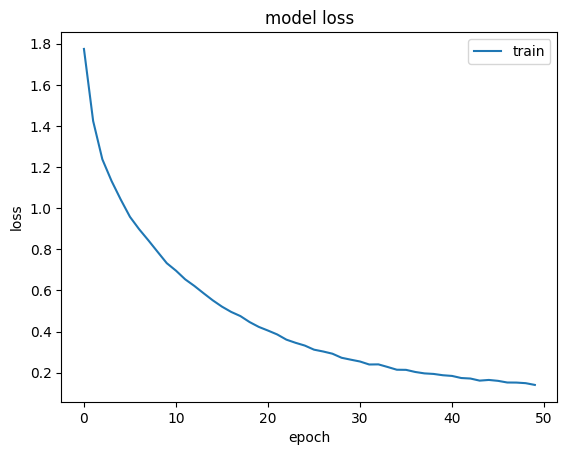

In [19]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()